In [58]:
#Importing all the necessary libraries to build the model
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, plot_roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

pd.set_option('display.max_columns', None)

In [59]:
#Reading the dataset and displaying the first 5 rows.
df = pd.read_csv('hotel_bookings.csv')
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

### Exploratory Data Analysis

In [60]:
#Using describe() to get an idea of the dataset
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [61]:
#Checking which of the columns have null values to impute.
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Dealing with missing data

In [62]:
#After looking at the dataset, imputing the null values with values that are suitable(mostly 0s).
df['agent'].fillna(0, inplace = True)
df['company'].fillna(0, inplace = True)
df['country'].fillna('Unknown', inplace = True)
df['children'].fillna(0, inplace = True)


In [63]:
#Checking how many different values are there in each column
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            178
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              334
company                            353
days_in_waiting_list     

<AxesSubplot:xlabel='arrival_date_month', ylabel='count'>

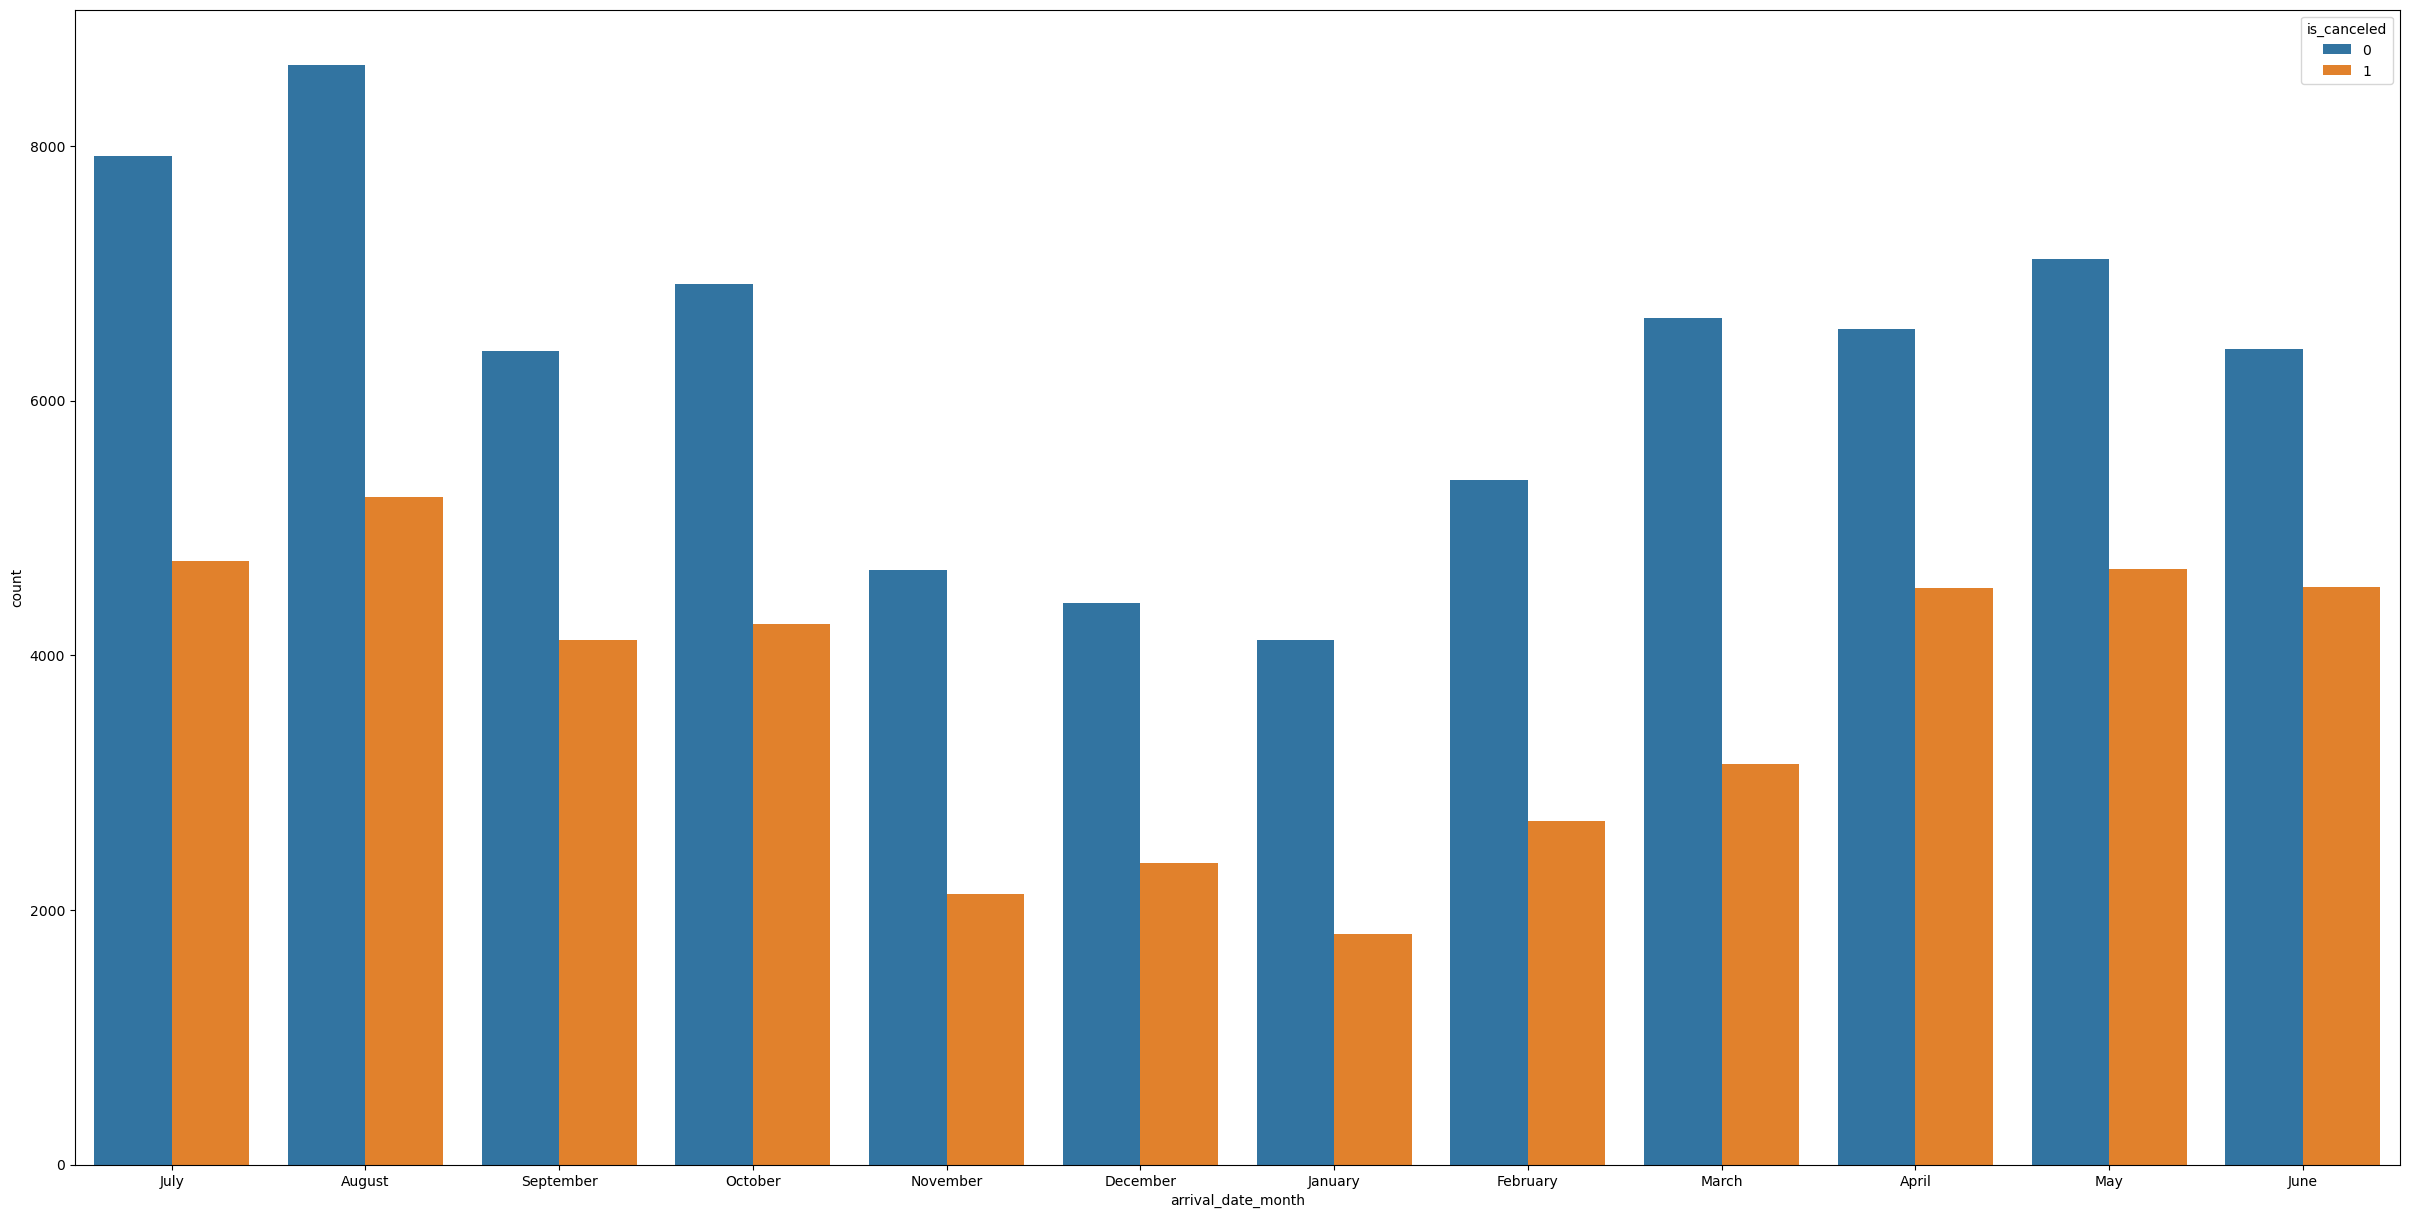

In [64]:
plt.figure(figsize=(30, 15))
sns.countplot(data = df, x = 'arrival_date_month', hue = 'is_canceled')

In [65]:
#August has most cancelations

### Using one-hot encoding techniques

In [66]:
#Using one-hot encoding techniques to convert string variables to integer.
df['hotel'] = [1 if x in ['Resort Hotel'] else 0 for x in df['hotel']]

df.drop(['country', 'meal'], axis = 1, inplace = True)

In [67]:
#Using one-hot encoding techniques to convert string variables to integer
df = pd.get_dummies(df, columns = ['arrival_date_month','market_segment', 'distribution_channel', 'deposit_type', 'customer_type'])

In [68]:
#Converting date-time values to numerical values.
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%Y/%m/%d')
df['res_y'] = df['reservation_status_date'].dt.year
df['res_m'] = df['reservation_status_date'].dt.month
df['res_d'] = df['reservation_status_date'].dt.day

In [69]:
#Checking whether the assigned room type is the same type as the reserved room type as this can have a major effect on whether
#the room is being cancelled or not.
def roomChange(row):
    if row['assigned_room_type'] == row['reserved_room_type']:
        return False
    else:
        return True

df['change_in_room'] = df.apply(roomChange, axis=1)

In [70]:
#Dropping features that are unnecessary.
df.drop(['assigned_room_type', 'reserved_room_type', 'reservation_status', 'reservation_status_date'], axis=1, inplace=True)

<AxesSubplot:>

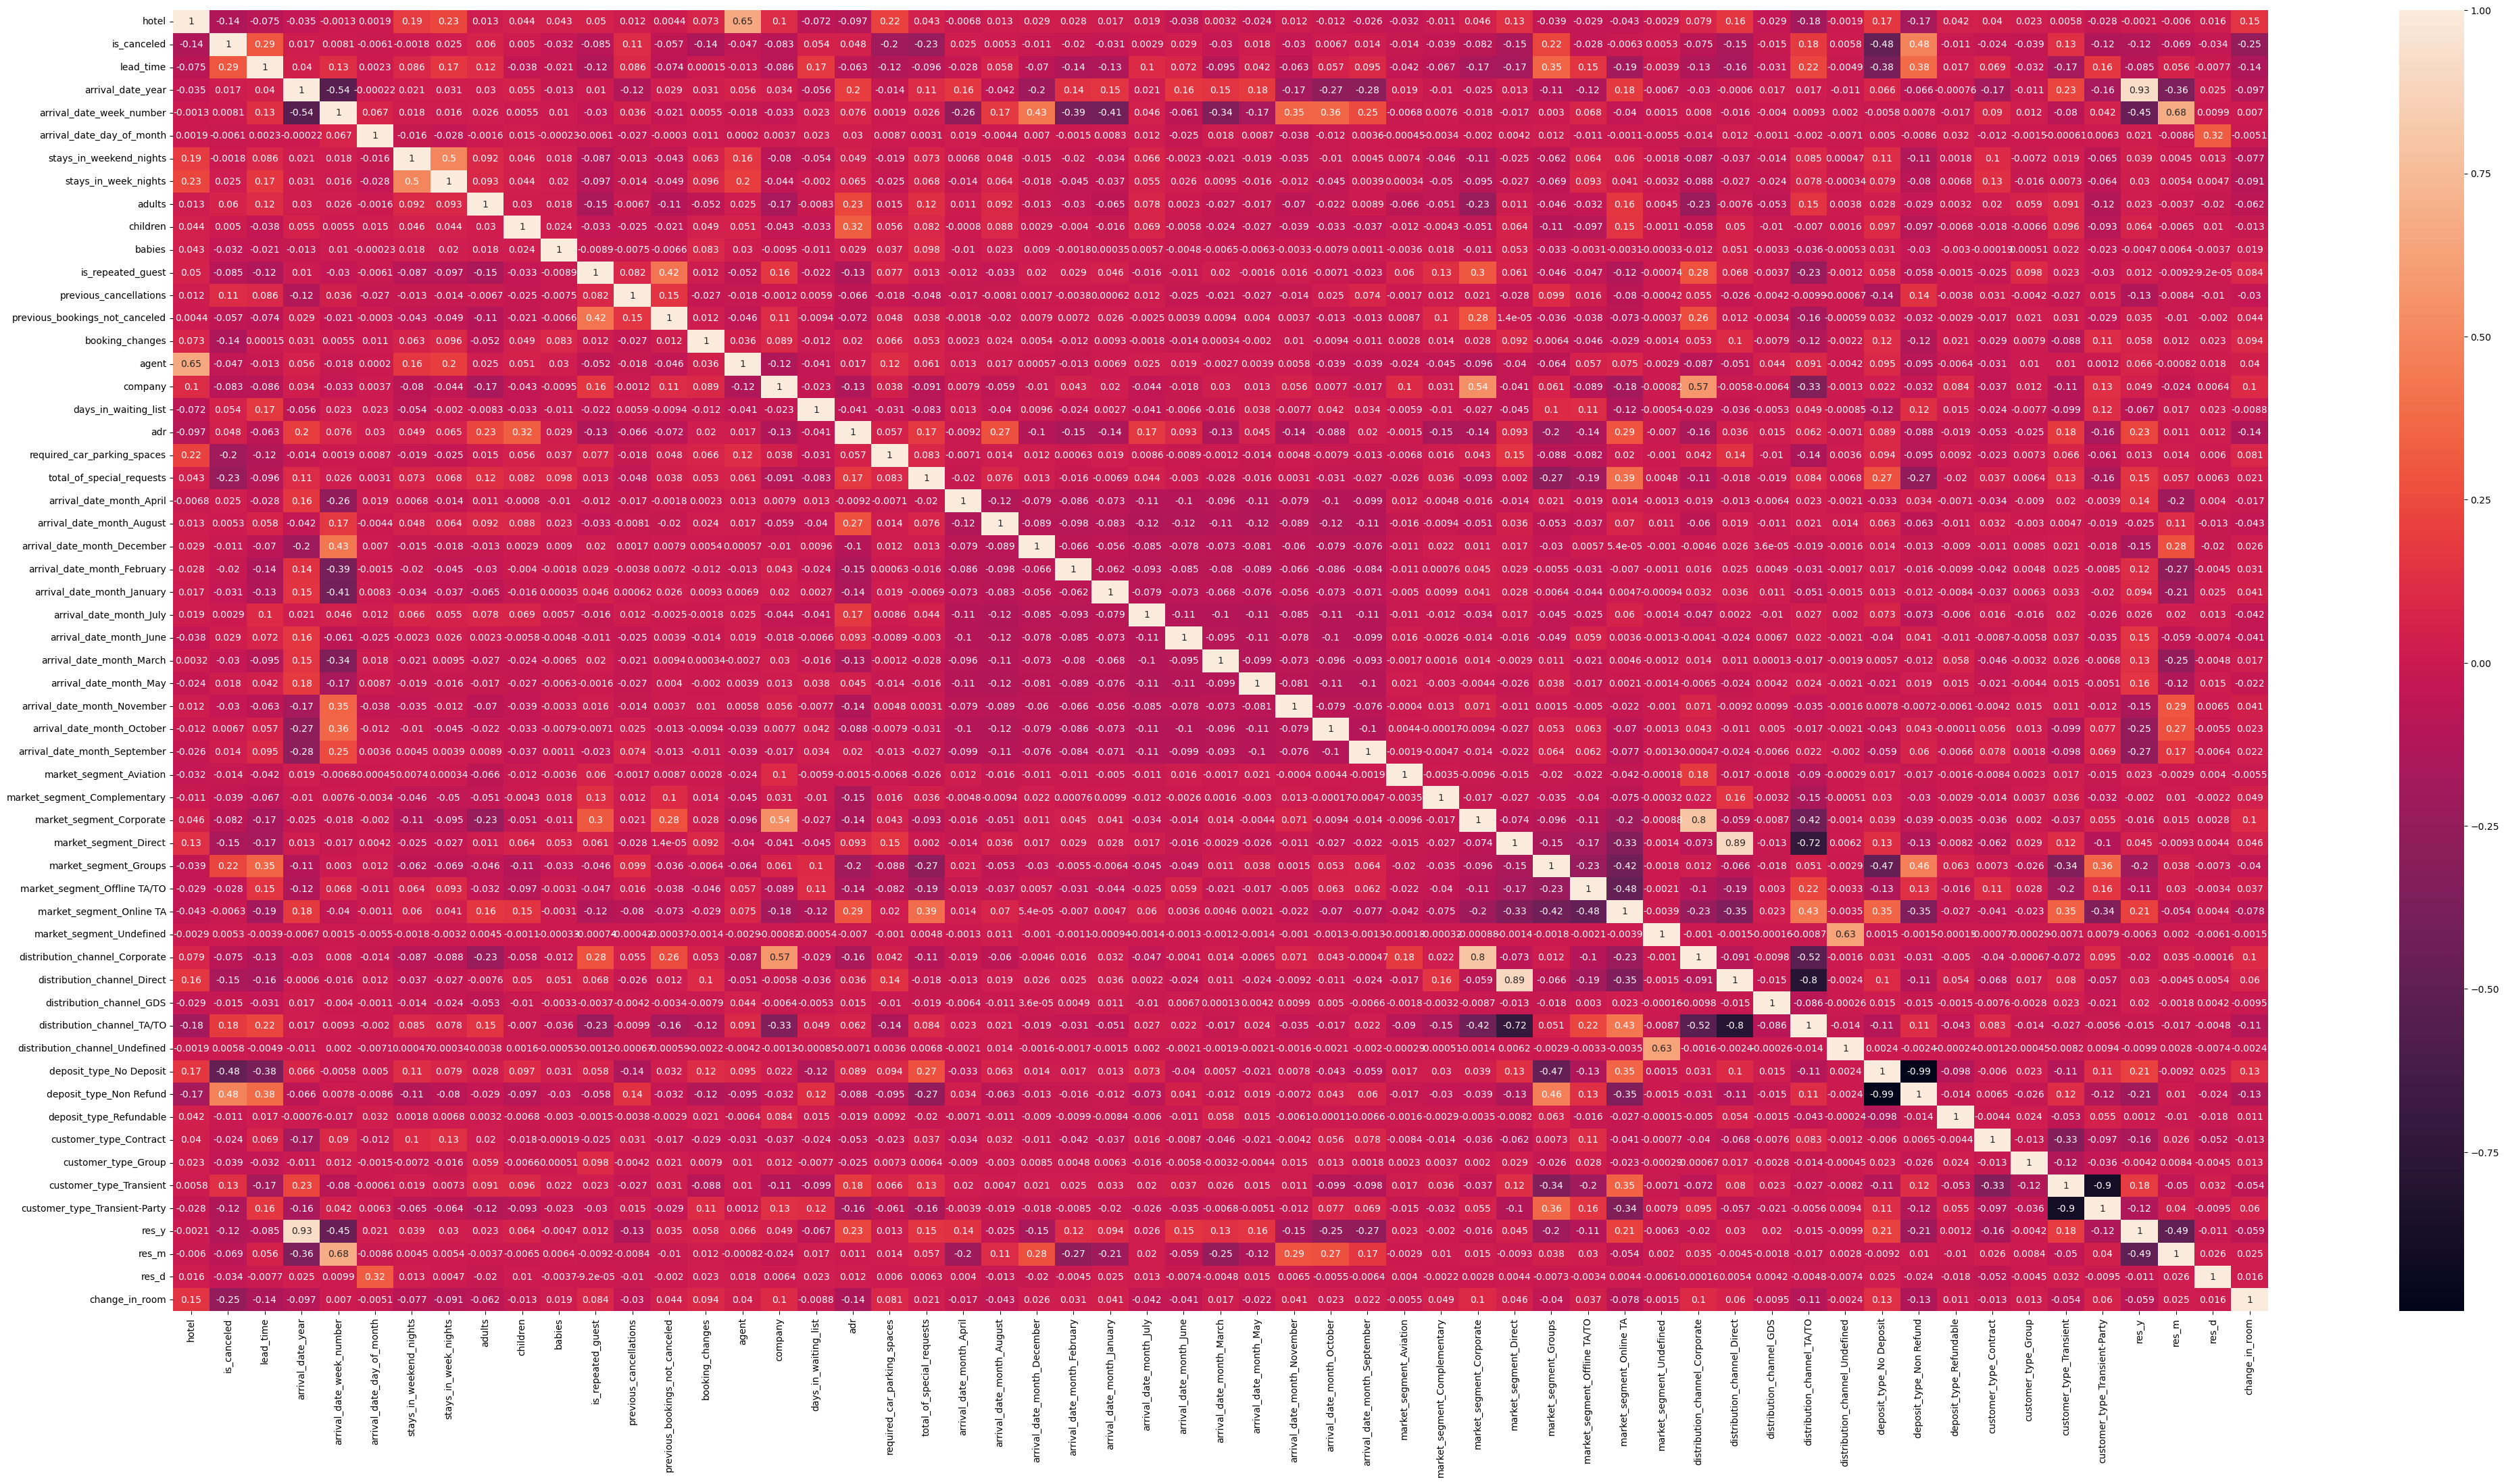

In [71]:
#Plotting a heatmap to determine which factors are highly correlated.
plt.figure(figsize=(50, 25))
sns.heatmap(df.corr(), annot = True)

In [72]:
#High correlation for is_canceled is with deposit_type_No Deposit, deposit_type_Non Refund, market_segment_Groups, lead_time

### Checking for outliers

In [73]:
df.describe()

hotel    is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000  119390.000000      119390.000000   
mean        0.335539       0.370416     104.011416        2016.156554   
std         0.472181       0.482918     106.863097           0.707476   
min         0.000000       0.000000       0.000000        2015.000000   
25%         0.000000       0.000000      18.000000        2016.000000   
50%         0.000000       0.000000      69.000000        2016.000000   
75%         1.000000       1.000000     160.000000        2017.000000   
max         1.000000       1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119390.000000  119390.000000      119390.000000   
mean        0.103886       0.007949           0.031912   
std         0.398555       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent        company  days_in_waiting_list  \
count    119390.000000  119390.000000  119390.000000         119390.000000   
mean          0.221124      74.828319      10.775157              2.321149   
std           0.652306     107.141953      53.943884             17.594721   
min           0.000000       0.000000       0.000000              0.000000   
25%           0.000000       7.000000       0.000000              0.000000   
50%           0.000000       9.000000       0.000000              0.000000   
75%           0.000000     152.000000       0.000000              0.000000   
max          21.000000     535.000000     543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  \
count  119390.000000                119390.000000              119390.000000   
mean      101.831122                     0.062518                   0.571363   
std        50.535790                     0.245291                   0.792798   
min        -6.380000      

C:\Users\rzctx\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lead_time'>

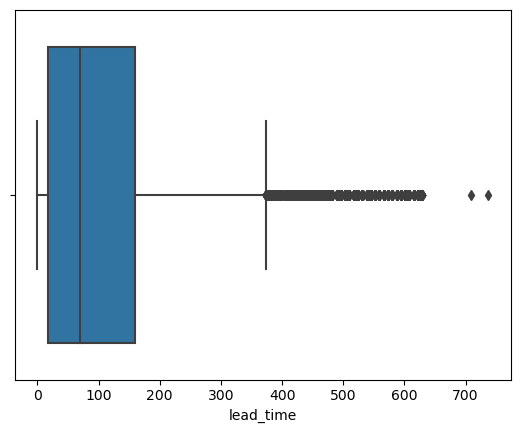

In [74]:
sns.boxplot(df['lead_time'])

In [75]:
#There are a lot of outliers in lead_time. However, lead_time the outliers in lead_time could possibly be an indication of 
#higher or lower cancelations in hotels. So I'm choosing to keep it in the dataset. If the model is not performing well, 
#we can later try removing these outliers and try it again.

C:\Users\rzctx\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stays_in_weekend_nights'>

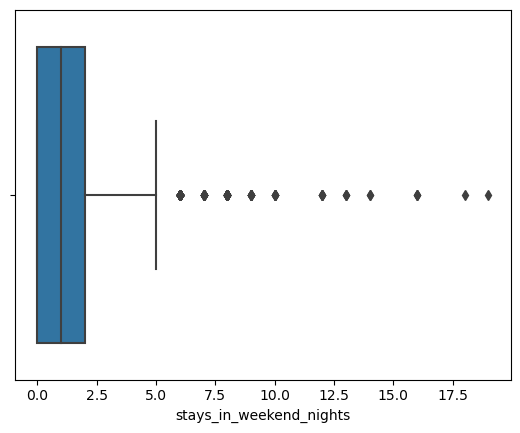

In [76]:
sns.boxplot(df['stays_in_weekend_nights'])

In [77]:
#Not a lot of outliers in the data. This won't be affecting the output of the results as much,
#Since the number of outliers is huge compared to the quantity of data. However,if the model perfomance is low, we can remove
#these outliers and try again.


### Using MinMaxScaler() to Normalize data

In [78]:
#Seperating the dataframe into independent and dependent variables.
X = pd.DataFrame(df.drop(['is_canceled'], axis = 1))
y = df['is_canceled']
scal = MinMaxScaler()
col = X.columns
X = pd.DataFrame(scal.fit_transform(X))
X.columns = col

In [79]:
#Splitting training and testing data
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.2, random_state = 0)

# Decision Tree

### Summary of Decision Tree model

1. Initially a preliminary model will be run with all the features that have been obtained from Exploratory Data Analysis.

2. Evaluation of the obtained model will take place. The metrics used to measure the model will be accuracy, recall, precision and F-1 score. A brief explanation of these metrics will be provided at the end of the code.

3. To reduce the size of data occupancy and runtime of the model, half of the features will be dropped based on the feature importances of the preliminary decision tree. The bottom 50 percentile of the features will be dropped since these features have low importances.

4. A new decision tree model will be trained and evaluated based on the newly obtained feature set. If this model performs as well as/or better than the preliminary model, the model will be the current champion.

5. Again, to optimize run time and data occupancy further, we will be reducing the new feature list again by half, dropping the bottom 50 percentile of features based on feature importances. This will leave us with 25 percent of the original feature list.

6. A new decision tree model will be trained and evaluated based on the newly obtained feature set. If this model performs as well as/or better than the current champion model, the new model will be the current champion.

7. This process continues until we obtain satisfactory accuracy and perfomance metrics. In the end, we were left with 12.5% of the original feature list.

8. Final model is run with the obtained feature importance with optimized data occupancy and run-time. Cross Validation is also performed here to increase confidence in model perfomance. Model is also timed based on training, predicting and cross validation time to measure and compare against other models.

Feature importance : The feature importance of a decision tree is obtained from taking the impurity of a node and subtracting the impurities of its child nodes. This will give us a value which measures the reduction in impurity due to that node further branching out.

Cross Validation: Reserving a portion of the dataset to evaluate the model later on. k-fold cross validation is used here.

In [80]:
#Running a preliminary DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(Xtrain,ytrain)
dtc.score(Xtest,ytest)

0.9535974537230923

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     14934
           1       0.94      0.94      0.94      8944

    accuracy                           0.95     23878
   macro avg       0.95      0.95      0.95     23878
weighted avg       0.95      0.95      0.95     23878



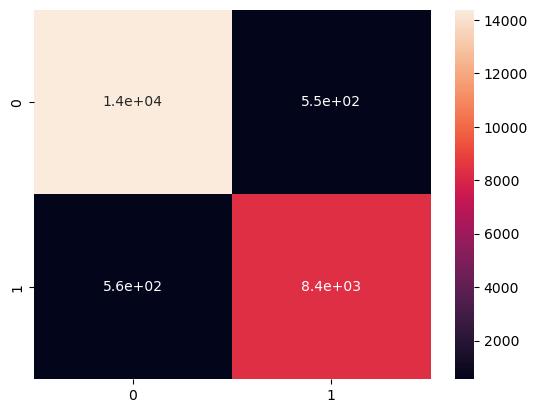

In [81]:
#Evaluating the model based on multiple parameters like F1-score, precision and recall
ypred = dtc.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot = True)
print(classification_report(ytest, ypred))

## Reducing the number of features used to minimize data requirement and model run time

### Only taking the top 50% of the data that has the highest feature importance for the Decision Tree Classifier

In [82]:
#Storing the names of the columns and the values of feature importances in a variable
fimpt = pd.DataFrame()
fimpt['ColName'] = X.columns
fimpt['Val'] = dtc.feature_importances_
print("Done")

Done


In [83]:
#Checking and removing the features that are not important. The lower 50% of the features are removed.
fimpt.loc[fimpt['Val'] < fimpt['Val'].median()] = None
fimpt.dropna(inplace = True)

In [84]:
#Creating a new Independent variable with the new selected features.
X_new = X[fimpt['ColName']]

Xtrain,Xtest,ytrain,ytest = train_test_split(X_new,y,test_size = 0.2, random_state = 0)

In [85]:
#Fitting and measuring the accuracy of the model.
dtc.fit(Xtrain,ytrain)
dtc.score(Xtest,ytest)

0.9542256470391155

In [86]:
#There hasn't been any major change in test score, so we can remove the next 50% of features, 
#making it 25% from the initial feature set.

In [87]:
#Storing the names of the columns and the values of feature importances in a variable
fimpt = pd.DataFrame()
fimpt['ColName'] = X_new.columns
fimpt['Val'] = dtc.feature_importances_
print("Done")

Done


In [88]:
#Checking and removing the features that are not important. The lower 50% of the features are removed.
fimpt.loc[fimpt['Val'] < fimpt['Val'].median()] = None
fimpt.dropna(inplace = True)

In [89]:
#Creating a new Independent variable with the new selected features.
X_new_25 = X[fimpt['ColName']]

Xtrain,Xtest,ytrain,ytest = train_test_split(X_new_25,y,test_size = 0.2, random_state = 0)

In [90]:
dtc.fit(Xtrain,ytrain)
dtc.score(Xtest,ytest)

0.9587486389144819

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     14934
           1       0.95      0.94      0.94      8944

    accuracy                           0.96     23878
   macro avg       0.96      0.96      0.96     23878
weighted avg       0.96      0.96      0.96     23878



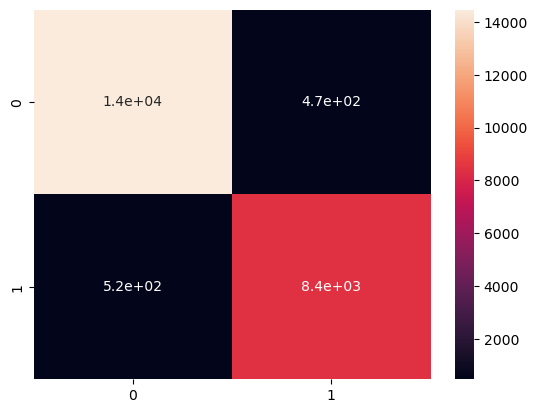

In [91]:
ypred = dtc.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot = True)
print(classification_report(ytest, ypred))

In [92]:
#There hasn't been any major reduction in test score. In fact, test score has increased.
#so we can further remove the next 50% of features, keeping the only 12.5% 
#of the initial feature set.

In [93]:
#Storing the names of the columns and the values of feature importances in a variable
fimpt = pd.DataFrame()
fimpt['ColName'] = X_new_25.columns
fimpt['Val'] = dtc.feature_importances_
print("Done")

Done


In [94]:
#Checking and removing the features that are not important. The lower 50% of the features are removed.
fimpt.loc[fimpt['Val'] < fimpt['Val'].median()] = None
fimpt.dropna(inplace = True)

In [95]:
#Creating a new Independent variable with the new selected features.
X_new_12 = X[fimpt['ColName']]

Xtrain,Xtest,ytrain,ytest = train_test_split(X_new_12,y,test_size = 0.2, random_state = 0)

In [96]:
#Fitting the model and checking the accuracy of the model
dtc.fit(Xtrain,ytrain)
dtc.score(Xtest,ytest)

0.9837926124466035

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     14934
           1       0.98      0.97      0.98      8944

    accuracy                           0.98     23878
   macro avg       0.98      0.98      0.98     23878
weighted avg       0.98      0.98      0.98     23878



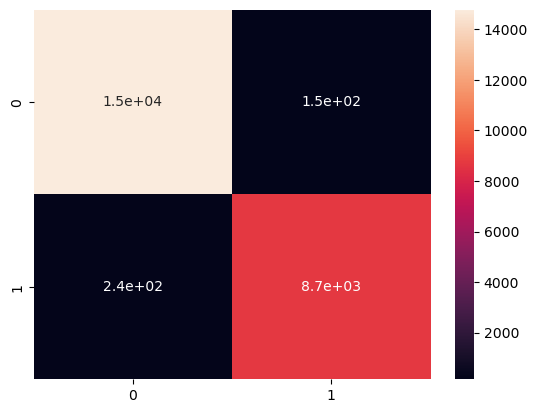

In [97]:
ypred = dtc.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot = True)
print(classification_report(ytest, ypred))

In [98]:
#The accuracy score and other metrics like F-1 Score, precision and recall drop significantly when only 12.5% of the
#features are used. So ideally we take 25% of the initial features to have an optimized model with minimized
#data occupancy and run-time of the model.

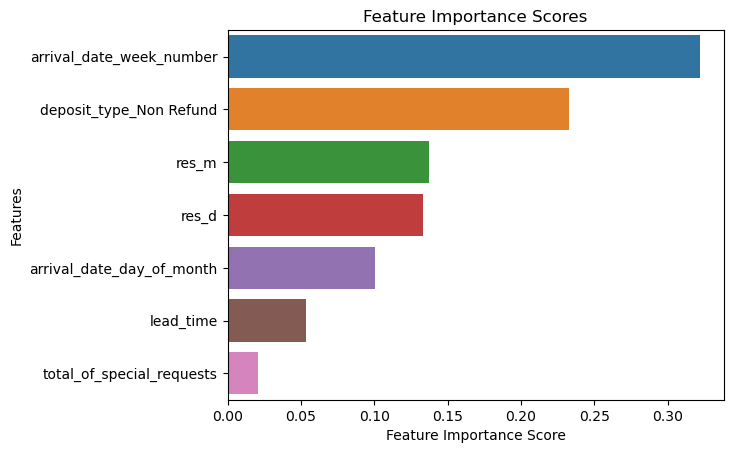

In [99]:
feature_imp_clf1 = pd.Series(dtc.feature_importances_,index = Xtrain.columns).sort_values(ascending = False)

sns.barplot(x=feature_imp_clf1, y=feature_imp_clf1.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Scores')
plt.show()

In [100]:
# As infered from the correlation heatmap, deposit_type_Non Refund, and lead_time 
# have shown to be highly important features to determine the output variable.

### Final model

In [101]:
#Fitting the DecisionTreeClassifier with the new selected features.
mtO = time.time()
mt = time.time()
dtc = DecisionTreeClassifier()
dtc.fit(Xtrain,ytrain)
print('Time to fit model :', time.time()-mt, 'seconds')
mt = time.time()
scr = cross_val_score(dtc, Xtrain, ytrain, cv = 5)
print('Time to cross validate model:', time.time()-mt, 'seconds')
mt = time.time()
ypred = dtc.predict(Xtest)
print('Time to predict for model:', time.time()-mt, 'seconds')
print('Cross Val Score :', scr)
print('Time to fit and run model:', time.time()-mtO,'seconds')

Time to fit model : 0.3975064754486084 seconds
Time to cross validate model: 1.550915002822876 seconds
Time to predict for model: 0.00603795051574707 seconds
Cross Val Score : [0.9821494  0.97811862 0.97864098 0.97953094 0.98178201]
Time to fit and run model: 1.9554862976074219 seconds


              precision    recall  f1-score   support

           0       0.98      0.99      0.99     14934
           1       0.98      0.97      0.98      8944

    accuracy                           0.98     23878
   macro avg       0.98      0.98      0.98     23878
weighted avg       0.98      0.98      0.98     23878

Accuracy Score : 0.9833319373481866
Precision Score : 0.9821710674791243
Recall Score : 0.9731663685152058
F-1 Score : 0.9776479838256767


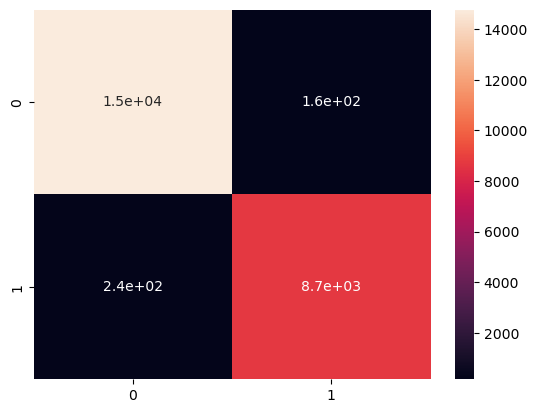

In [102]:
#I am printing the accuracy, precision, reacall and F-1 scores again even though it comes in the classification report
#because it is rounded inherently in it. Accurate scores when it is above 99.5% are not printed as it is rounded to 1.
ypred = dtc.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot = True)
print(classification_report(ytest, ypred))
print("Accuracy Score :", accuracy_score(ytest,ypred))
print("Precision Score :", precision_score(ytest,ypred))
print("Recall Score :", recall_score(ytest,ypred))
print("F-1 Score :", f1_score(ytest,ypred))

In [103]:
#Plotting the final Decision Tree
plt.figure(dpi=1200)
fig = plt.figure(figsize=(200,75))
plot_tree(dtc,
          filled=True,
          rounded=True,
          class_names=['Not cancelled', 'Cancelled'],
          feature_names=Xtrain.columns
         );
plt.show()

<Figure size 7680x5760 with 0 Axes>

# Logistic Regression

### Summary of Logistic Regression

1. Initially a preliminary model will be run with all the features that have been obtained from Exploratory Data Analysis.

2. Evaluation of the obtained model will take place. The metrics used to measure the model will be accuracy, recall, precision and F-1 score. A brief explanation of these metrics will be provided at the end of the code.

3. To reduce the size of data occupancy and runtime of the model, half of the features will be dropped based on the coefficients of the preliminary logistic regression. A loop has been run where if the accuracy of the model drops below the accuracy of the preliminary model, the loop will stop running and the coefficients of the model will be fixed.

4. Running the model and evaluating perfomance using the new model optimized for run time and data occupancy.

5. Running a loop using different probability thresholds to determine the best probability threshold for the logistic regression model.

6. Evaluating the model with cross validation and testing it with the newly-found best probability threshold to get best perfomance.

Probability threshold : Logistic regression model which follows a sigmoid function returns values of probabilities of output for the inputs. If the probability value is below the threshold value, the output is considered 0, and if it above the probability threshold, the output is 1.

Cross Validation: Reserving a portion of the dataset to evaluate the model later on. k-fold cross validation is used here.

In [104]:
#Splitting the data into training and testing.
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [105]:
#Running a preliminary DecisionTreeClassifier
lrc = LogisticRegression()
lrc.fit(Xtrain,ytrain)
lrc.score(Xtest,ytest)

C:\Users\rzctx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9142725521400452

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     14934
           1       1.00      0.77      0.87      8944

    accuracy                           0.91     23878
   macro avg       0.94      0.89      0.90     23878
weighted avg       0.92      0.91      0.91     23878



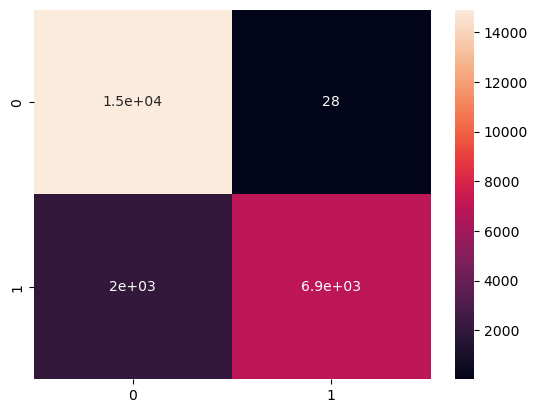

In [106]:
#Evaluating the model based on multiple parameters like F1-score, precision and recall
ypred = lrc.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot = True)
print(classification_report(ytest, ypred))

### Reducing the number of features in the Logistic Regression model 

In [107]:
#Storing the names of the columns and the values of feature importances in a variable
fimpt = pd.DataFrame()
fimpt['ColName'] = X.columns
fimpt['Val'] = lrc.coef_.T
print("Done")

Done


In [108]:
#Running a loop and removing the features with the lowest coefficients one by one as long as it doesn't decrease the previous
#91% accuracy obtained from using all the features
for i in range(1,len(fimpt)):
    if(accuracy_score(ytest,lrc.predict(Xtest))<0.91):
        fimpt.loc[fimpt['Val'] == fimpt['Val'].min()] = None
        fimpt.dropna(inplace = True)
        X_new = X[fimpt['ColName']]
        Xtrain,Xtest,ytrain,ytest = train_test_split(X_new,y,test_size = 0.2, random_state = 0)
        lrc.fit(Xtrain,ytrain)
        print(fimpt['ColName'])
    else:
        break


In [109]:
mtO = time.time()
mt = time.time()
lrc = LogisticRegression()
lrc.fit(Xtrain,ytrain)
print('Time to fit model :', time.time()-mt, 'seconds')
mt = time.time()
scr = cross_val_score(lrc, Xtrain, ytrain, cv = 5)
print('Time to cross validate model:', time.time()-mt, 'seconds')
mt = time.time()
ypred = lrc.predict(Xtest)
print('Time to predict for model:', time.time()-mt, 'seconds')
print('Cross Val Score :', scr)
print('Time to fit and run model:', time.time()-mtO,'seconds')

C:\Users\rzctx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Time to fit model : 1.7118852138519287 seconds


C:\Users\rzctx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rzctx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Time to cross validate model: 6.6902148723602295 seconds
Time to predict for model: 0.0055043697357177734 seconds
Cross Val Score : [0.90985709 0.9120557  0.9079154  0.91048058 0.9074966 ]
Time to fit and run model: 8.407604455947876 seconds


C:\Users\rzctx\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.88      1.00      0.94     14934
           1       1.00      0.77      0.87      8944

    accuracy                           0.91     23878
   macro avg       0.94      0.89      0.90     23878
weighted avg       0.92      0.91      0.91     23878

Accuracy Score : 0.9142725521400452
Precision Score : 0.995972961311664
Recall Score : 0.7742620751341681
F-1 Score : 0.8712335660816506


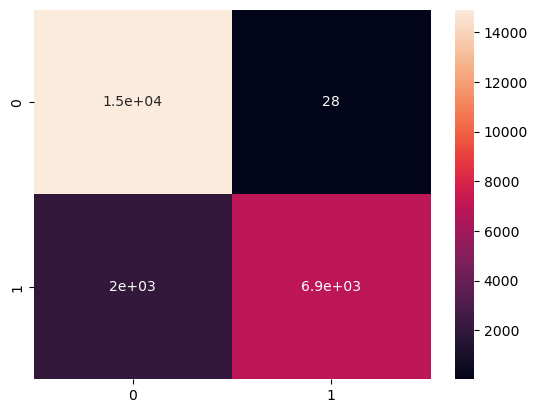

In [110]:
#I am printing the accuracy, precision, reacall and F-1 scores again even though it comes in the classification report
#because it is rounded inherently in it. Accurate scores when it is above 99.5% are not printed as it is rounded to 1.
ypred = lrc.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot = True)
print(classification_report(ytest, ypred))
print("Accuracy Score :", accuracy_score(ytest,ypred))
print("Precision Score :", precision_score(ytest,ypred))
print("Recall Score :", recall_score(ytest,ypred))
print("F-1 Score :", f1_score(ytest,ypred))

### Probability Threshold determination and final model

In [111]:
#Using different threshold values to determine which is the best one, after extracting the predicted probabilities for the
#logistic regression model
pred_proba_df = pd.DataFrame(lrc.predict_proba(Xtest))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = accuracy_score(ytest, Y_test_pred[1])
    print('Our testing accuracy is {}'.format(test_accuracy))
    print('Our F-1 Score is :', f1_score(ytest,Y_test_pred[1]))
    print('Our Recall Score is :', recall_score(ytest,Y_test_pred[1]))
    print('Our Precision Score is :', precision_score(ytest,Y_test_pred[1]))

    print(classification_report(ytest,Y_test_pred[1]))


******** For i = 0.05 ******
Our testing accuracy is 0.5051511851913896
Our F-1 Score is : 0.6011611422399243
Our Recall Score is : 0.9956395348837209
Our Precision Score is : 0.43056764336137704
              precision    recall  f1-score   support

           0       0.99      0.21      0.35     14934
           1       0.43      1.00      0.60      8944

    accuracy                           0.51     23878
   macro avg       0.71      0.60      0.47     23878
weighted avg       0.78      0.51      0.44     23878


******** For i = 0.1 ******
Our testing accuracy is 0.6202780802412262
Our F-1 Score is : 0.6602210979951283
Our Recall Score is : 0.9849060822898033
Our Precision Score is : 0.49653345358209794
              precision    recall  f1-score   support

           0       0.98      0.40      0.57     14934
           1       0.50      0.98      0.66      8944

    accuracy                           0.62     23878
   macro avg       0.74      0.69      0.61     23878
weighted

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     14934
           1       1.00      0.60      0.75      8944

    accuracy                           0.85     23878
   macro avg       0.90      0.80      0.82     23878
weighted avg       0.88      0.85      0.84     23878


******** For i = 0.95 ******
Our testing accuracy is 0.8318535890778123
Our F-1 Score is : 0.7105889137172926
Our Recall Score is : 0.5510957066189625
Our Precision Score is : 1.0
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     14934
           1       1.00      0.55      0.71      8944

    accuracy                           0.83     23878
   macro avg       0.89      0.78      0.80     23878
weighted avg       0.87      0.83      0.82     23878


******** For i = 0.99 ******
Our testing accuracy is 0.7949577016500544
Our F-1 Score is : 0.623152709359606
Our Recall Score is : 0.4525939177101968
Our Precision 

### Best threshold value in 0.35. Other models do not require threshold determination.

### Evaluating the final model

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     14934
           1       0.99      0.85      0.92      8944

    accuracy                           0.94     23878
   macro avg       0.95      0.92      0.94     23878
weighted avg       0.94      0.94      0.94     23878

Accuracy Score : 0.9409079487394254
Precision Score : 0.9864393645873692
Recall Score : 0.8539803220035778
F-1 Score : 0.9154431593455984


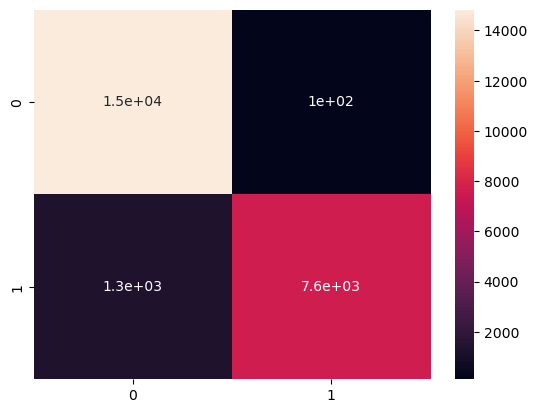

In [112]:
#Evaluating the model with 0.35 probability threshold
ypred = pred_proba_df.applymap(lambda x: 1 if x>0.35 else 0)
ypred = ypred[1]
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot = True)
print(classification_report(ytest, ypred))
print("Accuracy Score :", accuracy_score(ytest,ypred))
print("Precision Score :", precision_score(ytest,ypred))
print("Recall Score :", recall_score(ytest,ypred))
print("F-1 Score :", f1_score(ytest,ypred))

 ### Plotting ROC curve to compare models

C:\Users\rzctx\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\rzctx\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


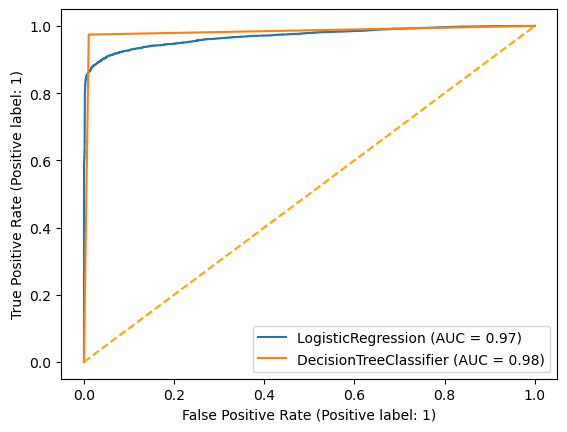

In [113]:
Xtrain2,Xtest2,ytrain2,ytest2 = train_test_split(X_new_12,y,test_size = 0.2, random_state = 0)
disp=plot_roc_curve(lrc, Xtest, ytest)
plot_roc_curve(dtc, Xtest2, ytest2, ax=disp.ax_)

plt.plot([0,1], [0,1], color='orange', linestyle='--');

#### The performance metrics used to measure the models are Accuracy, Recall, Precision and F-1 score

Accuracy Score: Accuracy score is used to measure the model performance in terms of measuring the ratio of sum of true positive and true negatives out of all the predictions made. This score is used as a metric to identify how the model is performing in a high level way.

Other metrics will be used to identify the intricate details of the model to truly ascertain if the built model is good or not for the specific application.

Recall Score: Recall score is used to measure the model performance in terms of measuring the count of true positives in a correct manner out of all the actual positive values. This metric is used in models where the cost of getting false negatives is high, like in a medical case where it's important to determine if a person has a disease or not to treat it.

Precision Score: Precision score is used to measure the model performance in measuring the count of true positives in the correct manner out of all positive predictions made. This metric is used to identify how many of the positive predictions we made are actually positive. It's important to cases where the cost of getting false positives is high.

F-1 Score: F-1 Score is the harmonic average of Recall and Precision. It can be used to assess models where neither Recall or Precision is necessarily more important than the other. High F-1 Scores usually indicate a very balanced model in terms or recall and precision.


### After feature selection

### Confidence level of model

DecisionTreeClassifier had accuracy score of 98.37% , recall score of 98.22%, precision score of 97.40%, F-1 score of 97.81% in testing data, which is new, unseen records for that specific model. So the model can be expected to perform the same when new data comes in, as long as nothing is changed.
